In [100]:
#Importing all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go

# Hypothesis 1 : Approach

1. Read the countries and internet usage files<br>
2. Get the population and the country names colums, and internet usage for each country from second dataset
3. from first datset determine the countries with largest population. like top 10 or top 20
4. check the results of 3 with internet usage.
5. Group by regions and get the regions with higfhest population.


In [101]:
# Main function to read all the data files

if __name__ == '__main__':
    secure_servers = pd.read_excel("C:/Users/admin/Desktop/final_project_2020Sp/Data/Secure_Internet_Servers_Worldwide.xlsx")
    internet_users = pd.read_excel("C:/Users/admin/Desktop/final_project_2020Sp/Data/Share_of_the_Internet_users_Worldwide.xlsx")
    country_profiles = pd.read_csv("C:/Users/admin/Desktop/final_project_2020Sp/Data/Country_Profiles.csv")
    Data_breach = pd.read_csv("C:/Users/admin/Desktop/final_project_2020Sp/Data/PRC_Data_Breach_Chronology.csv")
    mental_health_df = pd.read_csv("C:/Users/admin/Desktop/final_project_2020Sp/Data/number_with_depression_by_country.csv")
    worldwide_internet_usage = pd.read_excel("C:/Users/admin/Desktop/final_project_2020Sp/Data/Individuals_using_the_Internet(Uptill 2019).xls")

In [102]:
# For displaying world map

shapefile = 'C:/Users/admin/Desktop/final_project_2020Sp/110m_cultural/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.head()

,ADMIN,ADM0_A3,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [103]:
# Sorting alphabetically
country_profiles = country_profiles.sort_values('country')
internet_users = internet_users.sort_values('Location')

c_df = pd.DataFrame(country_profiles['country'])
i_df = pd.DataFrame(internet_users['Location'])


#Reference : https://stackoverflow.com/questions/49413005/replace-multiple-substrings-in-a-pandas-series-with-a-value


#Updating all the countries name
replacement = { 'Central African Rep.' : 'Central African Republic', 'Congo (Dem. Rep.)' : 'Democratic Republic of the Congo',
                                       "Dem. People's Rep. of Korea" : "Democratic People's Republic of Korea",
                                       'Dominican Rep.': "Dominican Rep." ,
                                       'Falkland (Malvinas) Is.' : "Falkland Islands (Malvinas)",
                                       'Hong Kong, China' : "China, Hong Kong SAR", 
                                       'Korea (Rep. of)' : "Republic of Korea",
                                       'Lao P.D.R.' : "Lao People's Democratic Republic" , 
                                       'Macao, China' : "China, Macao SAR", 
                                       'Micronesia' : "Micronesia (Federated States of)",
                                       'Nepal (Republic of)' : "Nepal", 
                                       'Swaziland (Eswatini)' : "Swaziland",
                                       'TFYR Macedonia' : "The former Yugoslav Republic of Macedonia", 
                                       'United States' : "United States of America", 
                                       'Venezuela' : "Venezuela (Bolivarian Republic of)",
                                       'Russian Federation' : 'Russia',
                                       'Bolivia (Plurinational State of)': 'Bolivia'
                                        }

replacement1 = {'United States' : "United States of America"}
replacement2 = {'Russian Federation' : 'Russia', "Bolivia (Plurinational State of)" : 'Bolivia'}

country_profiles['country'] = country_profiles['country'].replace(replacement2, regex=True)
internet_users['Location'] = internet_users['Location'].replace(replacement, regex=True)
mental_health_df['Entity'] = mental_health_df['Entity'].replace(replacement1, regex=True)




In [104]:
country_profiles

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Wallis and Futuna Islands,Polynesia,142,12,84.1,93.4,-99,-99,-99.0,-99,...,9,89,41.6,~0.0/1.6,-99,26,-99,-99,-99,-99
225,Western Sahara,NorthernAfrica,266000,553,2.1,110.1,-99,-99,-99.0,-99,...,-99,49,2.7,-99,-99,-99,-99,-99,-99,-99
226,Yemen,WesternAsia,527968,28250,53.5,102.1,29688,-28.1,1106.4,14.7,...,25.1,298,1,22.7/0.9,668,12,72.0/46.5,92.5/34.1,2.99,-99
227,Zambia,EasternAfrica,752612,17094,23.0,98.5,21255,2.9,1311.1,8.2,...,21,88,65.6,4.5/0.3,374,26,85.6/51.3,55.6/35.7,3.96,-99


In [105]:
#Creating datasets as per use
country_population = country_profiles[['country','Region','Population in thousands (2017)']]
internet_usage = internet_users[['Location','2017']]

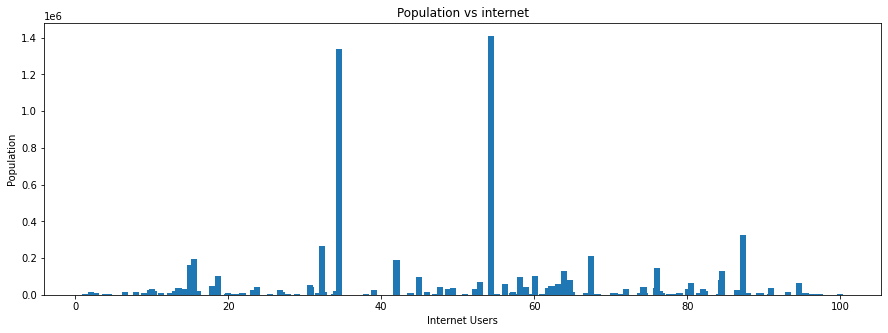

In [106]:
#Merging the datasets to draw insights
insights1 = country_population.merge(internet_usage,left_on="country",right_on ="Location",how ="left")

#Dropping all the NaN values
insights1 = insights1[pd.notnull(insights1["Location"])]

#Sorting by ascending order
insights1 = insights1.sort_values(by = ["Population in thousands (2017)"], ascending =False)

#Plotting the bar graph
fig, ax = plt.subplots(figsize=(15,5))
frequency = insights1["Population in thousands (2017)"]
points = insights1["2017"]
# width = 0.4
ax.bar(points, frequency)


ax.set_title('Population vs internet')
ax.set_xlabel('Internet Users')
ax.set_ylabel('Population')
plt.show()

In [107]:
#Creating a dataset for the world map
merged = gdf.merge(insights1, left_on = 'ADMIN', right_on = 'country',how="outer")

In [108]:
#Some countries could be missing bcoz of diff names in diff datasets ex:Russia, United Sates, Greenland, European countries,African countries

Text(0.5, 1.0, 'Internet Usage over the world')

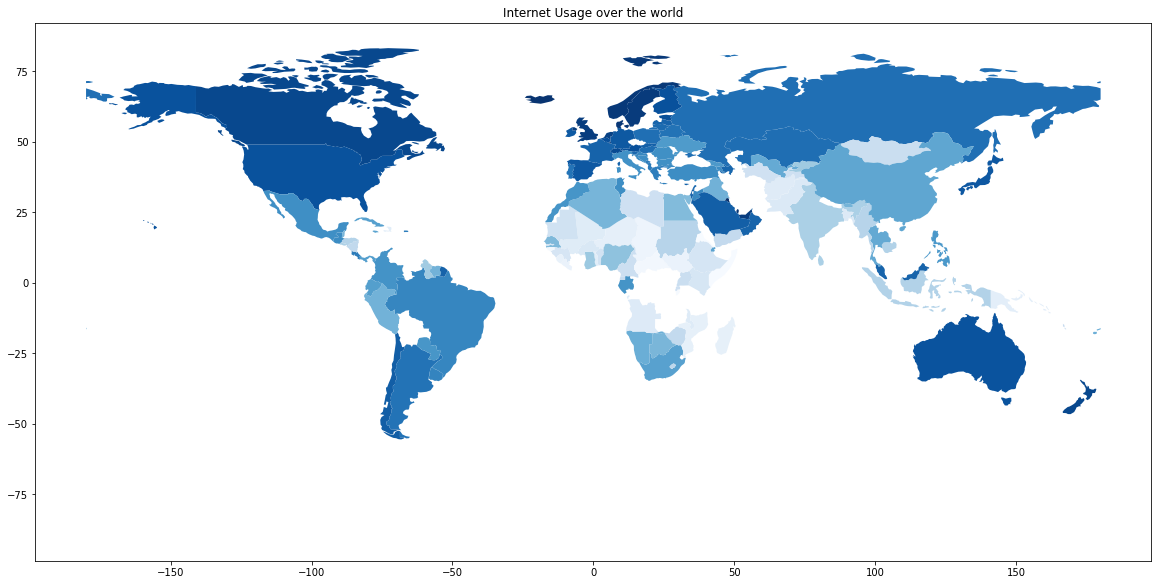

In [109]:
#Reference: https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d
variable = "2017"
vmin, vmax = 120, 220
#fig, ax = plt.subplots(1, figsize=(10, 6))
#fig =merged.subplot(column=variable, cmap="PuRd", figsize=(10, 6))
#Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="PuRd", norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
merged.plot(column=variable, cmap="Blues",figsize=(20,20))
plt.title("Internet Usage over the world")
#try adding interactivity

In [110]:
#Hypothesis 1.2 Mental health vs Internet usage

# Depressive disorders - no of people having depression in millions
# number of Internet users as % of total population

year = [2017]
mental_health_df = mental_health_df[mental_health_df['Year'].isin(year)]

#Renmaing the column
mental_health_df.rename(columns={"Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)": 'Depressive disorders'}, inplace=True)

country_population_2017 = country_profiles[['country','Population in thousands (2017)']]


#Merging the two datasets : mental_health_df and country_population_2017
cumulative_df = country_population_2017.merge(mental_health_df,left_on="country",right_on ="Entity",how ="left")

#Creating new column for Percentage of Depressed People
cumulative_df = cumulative_df[pd.notnull(cumulative_df["Entity"])]
cumulative_df["% of Depressed People"] = cumulative_df["Depressive disorders"].div(cumulative_df["Population in thousands (2017)"]).round(2)


#Merging internet users and cumulative dataset
cumulative_df = cumulative_df.merge(internet_usage,left_on="country",right_on ="Location",how ="left")

#Renmaing the column
cumulative_df.rename(columns={"2017" : '% of Internet Users'}, inplace=True)

# Dropping NAN values
cumulative_df = cumulative_df[pd.notnull(cumulative_df["Location"])]

#Dropping multilple country columns
cumulative_df = cumulative_df.drop(columns=['Entity', 'Location'])

#Rounding the values
cumulative_df['% of Internet Users'] = cumulative_df['% of Internet Users'].round(2)

#Checking correlation
cumulative_df['% of Depressed People'].corr(cumulative_df['% of Internet Users'])


0.5988824801940084

In [111]:
countries = [ 'Canada', 'Bangladesh', 'India','United Kingdom', 'United States of America', 'Somalia', 'Sri Lanka']

Specific_country_df = cumulative_df.loc[cumulative_df['country'].isin(countries)]

Specific_country_df = Specific_country_df[['country', '% of Depressed People', '% of Internet Users']]

countries = [ 'Bangladesh', 'Canada', 'India','Somalia', 'Sri Lanka','United Kingdom', 'United States of America']

fig = go.Figure(data=[
    go.Bar(name='% of Depressed People', x=countries, y=[36.60, 39.29, 34.12 , 29.41, 37.08, 43.87, 47.77]),
    go.Bar(name='% of Internet Users', x=countries, y=[15.00, 91.00,34.45, 2.00, 34.11, 94.62, 87.27])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

# Hypothesis 1.3

In [112]:
country_GDP = country_profiles[['country','GDP per capita (current US$)','Population in thousands (2017)']]

In [113]:
country_GDP

,country,GDP per capita (current US$),Population in thousands (2017)
0,Afghanistan,623.2,35530
1,Albania,3984.2,2930
2,Algeria,4154.1,41318
3,American Samoa,-99.0,56
4,Andorra,39896.4,77
...,...,...,...
224,Wallis and Futuna Islands,-99.0,12
225,Western Sahara,-99.0,553
226,Yemen,1106.4,28250
227,Zambia,1311.1,17094


In [114]:
sum_int_users = internet_users.iloc[:,1:].sum(axis=1)

In [115]:
average_int_usage = sum_int_users.div(11)

In [116]:
average_int_usage

120     5.594427
72     43.052488
59     26.577447
136    70.262466
137     6.589772
         ...    
196    40.950243
49     38.318528
197    14.887779
70     12.110691
135    12.216770
Length: 198, dtype: float64

In [117]:
location = internet_users["Location"]

In [118]:
location

120                           Afghanistan
72                                Albania
59                                Algeria
136                               Andorra
137                                Angola
                      ...                
196    Venezuela (Bolivarian Republic of)
49                               Viet Nam
197                                 Yemen
70                                 Zambia
135                              Zimbabwe
Name: Location, Length: 198, dtype: object

In [119]:
insights2= pd.concat([location, average_int_usage], axis=1)

In [120]:
insights2.columns = ["Country","Average Internet usage over the years"]

In [121]:
insights2

,Country,Average Internet usage over the years
120,Afghanistan,5.594427
72,Albania,43.052488
59,Algeria,26.577447
136,Andorra,70.262466
137,Angola,6.589772
...,...,...
196,Venezuela (Bolivarian Republic of),40.950243
49,Viet Nam,38.318528
197,Yemen,14.887779
70,Zambia,12.110691


In [122]:
GDP_vs_int_usage = insights2.merge(country_GDP,left_on="Country",right_on="country",how="left")

In [123]:
GDP_vs_int_usage

,Country,Average Internet usage over the years,country,GDP per capita (current US$),Population in thousands (2017)
0,Afghanistan,5.594427,Afghanistan,623.2,35530.0
1,Albania,43.052488,Albania,3984.2,2930.0
2,Algeria,26.577447,Algeria,4154.1,41318.0
3,Andorra,70.262466,Andorra,39896.4,77.0
4,Angola,6.589772,Angola,4714.1,29784.0
...,...,...,...,...,...
193,Venezuela (Bolivarian Republic of),40.950243,Venezuela (Bolivarian Republic of),11068.9,31977.0
194,Viet Nam,38.318528,Viet Nam,2067.9,95541.0
195,Yemen,14.887779,Yemen,1106.4,28250.0
196,Zambia,12.110691,Zambia,1311.1,17094.0


In [124]:
#Let's make a plot of GDP vs Average internet Usage
#reference for plotly : https://plotly.com/python/bubble-charts/

In [125]:
fig = px.scatter(GDP_vs_int_usage, x="GDP per capita (current US$)", y="Average Internet usage over the years",
        color="Country",size= "Average Internet usage over the years",
                 hover_name="country", log_x=True, size_max=60)
fig.show()

# Hypothesis 2

We expect that countries with higher internet usage are more prone to security breaches.

internet users
security breaches

In [126]:
data_breaches = pd.read_csv("C:/Users/admin/Desktop/final_project_2020Sp/Data/databreaches.csv",encoding='latin-1')

In [127]:
data_breaches.head()

,Date,Notify,URL,IP,Country,OS,WebServer,Encoding,Lang
0,1998-01-02,Team CodeZero,http://www.janet-jackson.com,NaN,UNKNOWN,Unknown,Unknown,utf-8,NaN
1,1998-01-03,Feliz,http://cariari.ucr.ac.cr,NaN,COSTARICA,Unknown,Unknown,NaN,NaN
2,1998-01-04,Optiklenz(LOU),http://marin.k12.ca.us,NaN,UNITED STATES,Unknown,Unknown,iso-8859-1,Helvetica
3,1998-01-04,Team CodeZero,http://www.dm.af.mil,NaN,AFGHANISTAN,Unknown,Unknown,utf-8,NaN
4,1998-01-04,Team CodeZero,http://www.bolling.af.mil,NaN,AFGHANISTAN,Unknown,Unknown,windows-1252,Times New Roman


Internet usage is defined as internet users as a percentage of the population.

In [128]:
data_breaches_info = data_breaches[["Date","Country"]]

In [129]:
data_breaches_info

,Date,Country
0,1998-01-02,UNKNOWN
1,1998-01-03,COSTARICA
2,1998-01-04,UNITED STATES
3,1998-01-04,AFGHANISTAN
4,1998-01-04,AFGHANISTAN
...,...,...
212088,2015-09-01,Unknown
212089,2015-09-01,Africa
212090,2015-09-01,Unknown
212091,2015-09-01,Unknown


In [130]:
data_breaches_info["Date"] = data_breaches_info[(data_breaches["Date"] >'2000-1-1')]

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
data_breaches_info

,Date,Country
0,NaN,UNKNOWN
1,NaN,COSTARICA
2,NaN,UNITED STATES
3,NaN,AFGHANISTAN
4,NaN,AFGHANISTAN
...,...,...
212088,2015-09-01,Unknown
212089,2015-09-01,Africa
212090,2015-09-01,Unknown
212091,2015-09-01,Unknown


In [132]:
#filtering out nan values

In [133]:
data_breaches_info = data_breaches_info.dropna()

In [134]:
#only breaches data from 2020.

In [135]:
data_breaches_info

,Date,Country
3139,2000-10-01,BRAZIL
3140,2000-10-01,NICARAGUA
3141,2000-10-01,GERMANY
3143,2000-10-01,UNKNOWN
3144,2000-10-01,UNKNOWN
...,...,...
212088,2015-09-01,Unknown
212089,2015-09-01,Africa
212090,2015-09-01,Unknown
212091,2015-09-01,Unknown


In [136]:
data_breaches_info["Country"] = data_breaches_info["Country"].astype(str)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [137]:
data_breaches_per_country = pd.DataFrame(data_breaches_info["Country"].value_counts().rename_axis('Country').reset_index(name='No. of Data Breaches'))

In [138]:
data_breaches_per_country

,Country,No. of Data Breaches
0,United States,29928
1,UNITED STATES,28294
2,UNKNOWN,8555
3,Spain,5665
4,BRAZIL,5088
...,...,...
350,"Nigeria""",1
351,Tajikistan,1
352,Togo,1
353,ASIA/PACIFIC REGION,1


In [139]:

 #stackoverflow #https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p

Filtering out rows that have country as Unknown

In [140]:
data_breaches_per_country = data_breaches_per_country[~data_breaches_per_country.Country.str.contains("UNKNOWN")]

In [141]:
data_breaches_per_country = data_breaches_per_country[~data_breaches_per_country.Country.str.contains("Unknown")]

In [142]:
data_breaches_per_country

,Country,No. of Data Breaches
0,United States,29928
1,UNITED STATES,28294
3,Spain,5665
4,BRAZIL,5088
5,Germany,4088
...,...,...
350,"Nigeria""",1
351,Tajikistan,1
352,Togo,1
353,ASIA/PACIFIC REGION,1


In [143]:
#df.Geo.str.replace("[({':]", "") #https://python-forum.io/Thread-Removing-characters-from-columns-in-data-frame
# data_breaches_per_country["Country"] = data_breaches_per_country.Country.str.replace("[b']","")

In [144]:
data_breaches_per_country

,Country,No. of Data Breaches
0,United States,29928
1,UNITED STATES,28294
3,Spain,5665
4,BRAZIL,5088
5,Germany,4088
...,...,...
350,"Nigeria""",1
351,Tajikistan,1
352,Togo,1
353,ASIA/PACIFIC REGION,1


# Convert the countries to lower case

In [145]:
data_breaches_per_country["Country"] = data_breaches_per_country["Country"].str.capitalize()

In [146]:
data_breaches_per_country 

,Country,No. of Data Breaches
0,United states,29928
1,United states,28294
3,Spain,5665
4,Brazil,5088
5,Germany,4088
...,...,...
350,"Nigeria""",1
351,Tajikistan,1
352,Togo,1
353,Asia/pacific region,1


In [147]:
data_breaches_per_country = data_breaches_per_country.drop_duplicates(subset="Country")

In [148]:
insights2

,Country,Average Internet usage over the years
120,Afghanistan,5.594427
72,Albania,43.052488
59,Algeria,26.577447
136,Andorra,70.262466
137,Angola,6.589772
...,...,...
196,Venezuela (Bolivarian Republic of),40.950243
49,Viet Nam,38.318528
197,Yemen,14.887779
70,Zambia,12.110691


In [149]:
data_breach_int_users = insights2.merge(data_breaches_per_country,left_on="Country",right_on="Country",how= "left")

In [150]:
data_breach_int_users

,Country,Average Internet usage over the years,No. of Data Breaches
0,Afghanistan,5.594427,1.0
1,Albania,43.052488,41.0
2,Algeria,26.577447,5.0
3,Andorra,70.262466,5.0
4,Angola,6.589772,NaN
...,...,...,...
193,Venezuela (Bolivarian Republic of),40.950243,NaN
194,Viet Nam,38.318528,NaN
195,Yemen,14.887779,3.0
196,Zambia,12.110691,5.0


In [151]:
data_breach_int_users = data_breach_int_users.dropna()

In [152]:
data_breach_int_users

,Country,Average Internet usage over the years,No. of Data Breaches
0,Afghanistan,5.594427,1.0
1,Albania,43.052488,41.0
2,Algeria,26.577447,5.0
3,Andorra,70.262466,5.0
6,Argentina,46.769656,848.0
...,...,...,...
191,Uzbekistan,24.193113,8.0
192,Vanuatu,12.469078,4.0
195,Yemen,14.887779,3.0
196,Zambia,12.110691,5.0


In [153]:
fig = px.scatter(data_breach_int_users, x="No. of Data Breaches", y="Average Internet usage over the years")

fig.show()


# Hypothesis 3

higher secure internet servers would have lesser cases of data breaches.

In [154]:
 secure_servers =  secure_servers[["Country","2018"]]

In [155]:
secure_servers = secure_servers.dropna()

In [156]:
secure_servers

,Country,2018
0,United States,21517004.0
1,Germany,4676435.0
2,United Kingdom,1811830.0
3,Netherlands,1733183.0
4,Japan,1476696.0
...,...,...
190,Guinea-Bissau,4.0
191,Central African Republic,3.0
192,Nauru,1.0
193,Tuvalu,1.0


In [157]:
data_breaches_per_country 

,Country,No. of Data Breaches
0,United states,29928
3,Spain,5665
4,Brazil,5088
5,Germany,4088
6,France,3681
...,...,...
347,New caledoni,1
348,Easttimor,1
350,"Nigeria""",1
353,Asia/pacific region,1


In [158]:
data_breaches_per_country["Country"] = data_breaches_per_country.Country.str.title()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [159]:
data_breaches_per_country

,Country,No. of Data Breaches
0,United States,29928
3,Spain,5665
4,Brazil,5088
5,Germany,4088
6,France,3681
...,...,...
347,New Caledoni,1
348,Easttimor,1
350,"Nigeria""",1
353,Asia/Pacific Region,1


In [160]:
server_data_breach = secure_servers.merge(data_breaches_per_country,left_on="Country",right_on="Country",how="left")

In [161]:
server_data_breach = server_data_breach.dropna()

In [162]:
server_data_breach.columns = ["Country","No.of Secure Servers","No. of Data Breaches"]

In [163]:
server_data_breach

,Country,No.of Secure Servers,No. of Data Breaches
0,United States,21517004.0,29928.0
1,Germany,4676435.0,4088.0
2,United Kingdom,1811830.0,3556.0
3,Netherlands,1733183.0,1426.0
4,Japan,1476696.0,953.0
...,...,...,...
176,Mauritania,24.0,3.0
178,Tonga,18.0,17.0
184,Niger,11.0,2.0
193,Tuvalu,1.0,16.0


In [164]:
fig = px.treemap(server_data_breach, path=['Country'], values='No.of Secure Servers',
                  color='No. of Data Breaches', hover_data=['Country'],
                  color_continuous_scale='RdBu',
                  )
fig.show()